<a href="https://colab.research.google.com/github/GonRosas97/Algoritmos_ROG_Practica/blob/main/Practica_Optimizaci%C3%B3n_ROG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema a desarrollar: Combinar cifras y operaciones
*Alumno:* **Gonzalo Rosas Ortiz**

*github:* https://github.com/GonRosas97/Algoritmos_ROG_Practica/blob/main/Practica_Optimizaci%C3%B3n_ROG.ipynb

## Definición del problema

<ul>
<li>Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma, resta, multiplicación y división.</li>
<li>Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada.</li>
<li>Debe analizar el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones</li>
  <ul>
  <li>¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?</li>
  <li>¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?</li>
  </ul>
</ul>

## Análisis del problema

El problema nos da los siguientes datos de entrada:
<ol>
<li>Un conjunto de cifras que van del 1 al 9, al cual denotaremos como $C = \{1,2,3...,9\}$.</li>
<li>Un segundo conjunto de operadores elementales que denotaremos como $O_p=\{+,-,*,/\}$.</li>
<li>La salida debe ser una combinatoria de $C$ y $O_p$, de tal modo que estén alternados y no exista ningún elemento repetido.</li>
</ol>

Las condiciones anteriores generan una expresión matemática compuesta por 9 elementos: 4 signos y 5 números. Esto debido a que |Op| < |C|. Lo anterior genera las siguientes restricciones:

<ol>
<li>Debemos escoger 5 elementos de $C$, donde no hay repeticiones.</li>
<li>Tomamos todos los elementos de $O_p$ donde tampoco hay repeticiones.</li>
</ol>

**1- ¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?**

Para responder a esta pregunta, desglozaremos una a una cada restricción para poder llegar a la respuesta final.

1.Escoger 5 elementos de $C$ sin repeticiones

Este escenario dentro de la combinatoria se conoce como **variación**, dado que debemos escoger n elementos de un conjunto y el orden si importa. Dicho caso tiene la siguiente forma:

$$ V_{n,k} = \frac{n!}{(n-k)!}$$

Aplicando la ecuación anterior a nuestro problema, obtenemos el siguiente número de variaciones posibles:

$$V_{9,5} = \frac{9!}{(9-5)!}$$
$$V_{9,5} = \frac{9!}{4!}$$

$$V_{9,5} = 15120  $$

2.Tomar todos los elementos de $O_p$ sin repeticiones

A diferencia de la restricción 1, aquí se trabaja con todos los elementos del conjunto $O_p$. Este escenario dentro de la combinatoria se llama **permutación** y se expresa mediante la siguiente fórmula:

$$ P_{n} = n!$$

Que aplicado a nuestro problema, nos arroja el siguiente valor:

$$ P_{4} = 4!$$

$$ P_{4} = 24$$

Finalmente, para contestar a la pregunta inicial, sabemos que, por cada combinación obtenida por la restricción 1, le tocan n permutaciones de la restricción 2, dando el siguiente resultado:

$$ R = V_{n,k} * P_{m} =\frac{n!}{(n-k)!} * m! $$

$$ R =  V_{5,9} * P_{4} = \frac{9!}{4!} * 4! $$

$$ R = 362,880 $$

En resumen, existen **362,880** posibilidades.

**2. ¿Cuántas posibilidades hay sin tener en cuenta las restricciones?**

Para este escenario, se aplica la variación con repetición para $C$, siguiendo las siguiente fórmula:

$$VR^{r}_n = n^{r}$$

Y para $O_p$ cambia completamente el escenario, a priori pensaríamos en cambiar a una permutación con repetición a como se muestra a continuación:

$$P^{\alpha,\beta,\gamma...}_n =\frac{n!}{\alpha!*\beta!*\gamma!***}$$

Pero como no sabemos cuanto vale cada repetición por signo, no podemos usar la fórmula anterior. Es por esto que optamos por aplicar nuevamente la variación con repetición:

$$VR^{r}_n = n^{r}$$

Finalmente la expresión para calcular las expresiones sin restricciones queda de la siguiente forma:

$$R = VR^{r}_n * VR^{r}_n $$

$$R = n^{r} *  n^{r} $$

$$R = 5^{9} *  4^{4} $$


Dando un total **500,000,000** posibilidades.

**3. ¿Cuál es la estructura de datos que mejor se adapta al problema?**

Para responder esta pregunta plantearemos el razonamiento que debemos seguir, el cual, se lista a continuación:

<ol>
<li>Se elige un elemento de $C$, donde inicialmente tenemos $|C|$ posibles valores.</li>
<li>Una vez elegido el elemento de $C$, debemos seleccionar un elemento de $O_p$, donde incialmente tenemos $|O_P|$ valores posibles.</li>
<li>Hasta aquí completamos un ciclo, que consta de un elemento de $C$ y un elemento de $O_p$. Ahora debemos repetir los 2 pasos anteriores pero con $|C|-1$ y $|O_p|-1$ debido a que no se permiten las repeticiones en la solución final.</li>
<li>Repetimos esto hasta que ya no tengamos elementos disponibles en $O_p$. ni en $C$</li>
</ol>

La lógica anterior se puede representar gráficamente de la siguiente manera:




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


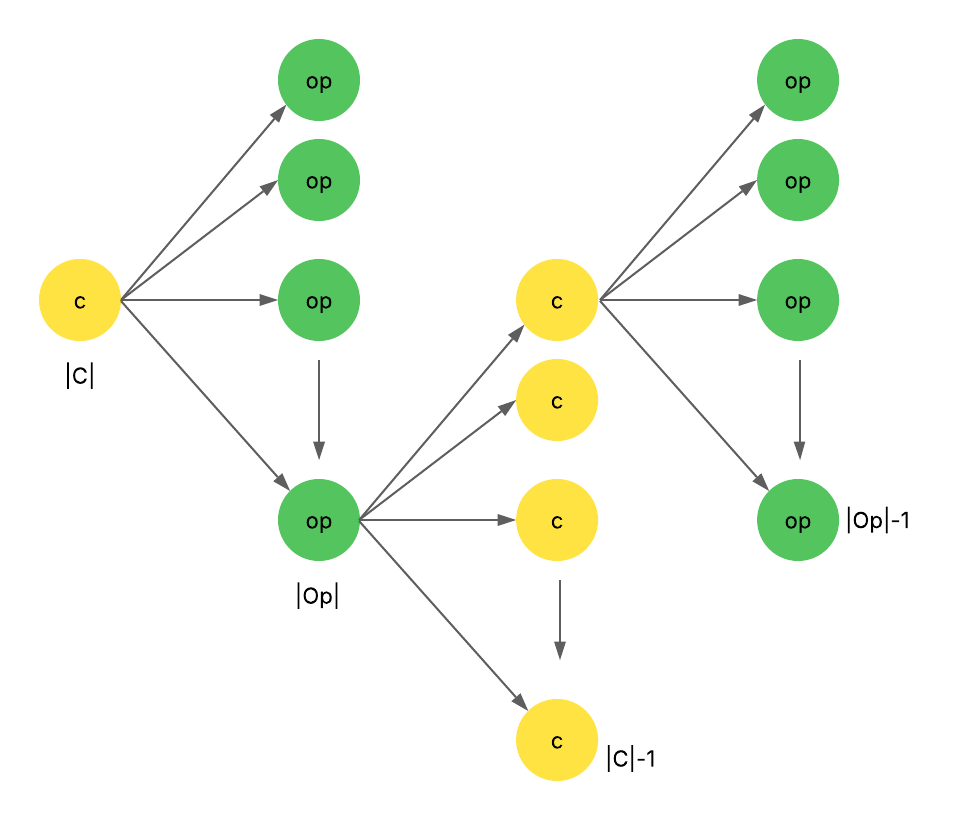

In [ ]:
from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')

display(Image(filename="/content/drive/MyDrive/Master/Optimizacion /fuerza_bruta.png",width=900, height=600))

Entonces, como en cada paso podemos ir construyendo la respuesta final por etapas y en cada etapa podemos la estructura que mejor se adapta a este problema es un **árbol**.

**4.¿Cuál es la función objetivo?**

Para hallar la función objetivo debemos identificar las variables dependientes, las cuales son:
<ul>
<li> El conjunto $C$ de cifras, del cual, podemos tomar 5 elementos.</li>
<li> El conjunto $O_p$ de operadores, del cual, hay que tomar todos los elementos</li>
<li> El resultado final debe ser una sequencia de tipo número-operador-.</li>
</ul>

Entonces si tomamos todas las consideraciones anteriores tenemos que la función objetivo tiene la siguiente forma:

$$Z = C_1 + O_{p1} + C_2 + O_{p2} + C_3 + O_{p3}+ C_4  + O_{p4} + C_5$$

**5.¿Es un problema de maximización o minimización?**

Ninguno, debido a la función objetivo del apartado anterior, al buscar una expresión que nos de exactamente el número que buscamos, no podemos decir que es de máximización o minimización, el problema es de búsqueda exacta.

## 6. Diseña un algoritmo para resolver por fuerza bruta.


1. Iniciaremos por definir nuestras variables de trabajo



In [ ]:
import numpy as np
from numpy import random
import math
import operator

In [ ]:
C = np.array([x for x in range(1,10)])
Op= np.array(['+','-','*','/'])
print(f"C -> {C}")
print(f"Op -> {Op}")


C -> [1 2 3 4 5 6 7 8 9]
Op -> ['+' '-' '*' '/']


2. Iniciaremos por construir la restricción 2, que es definir todas las permutaciones posibles de $Op$

In [ ]:
def permutations(input_set):

      def create_permutations(current_permutation, remaining_elements):
        if(len(remaining_elements) == 0):
          result.append(current_permutation)
          return

        for operator in remaining_elements:

          current_permutation_copy = current_permutation.copy()
          current_permutation_copy.append(str(operator))

          remaining_elements_copy = remaining_elements.copy()
          remaining_elements_copy -= {operator}
          create_permutations( current_permutation_copy , remaining_elements_copy )

      result = []
      create_permutations([],set(input_set))
      return result


Op_permutations = permutations(Op)
print(len(Op_permutations))

#print("Permutaciones de Op")
# for index,perm in enumerate(Op_permutations):
#   permToString = "".join(perm)
#   print(f"{index+1} -> {permToString} ")

24


3. Procedemos a construir todas las variaciones de $C$

In [ ]:
def variations(numbers_set, k):

  def create_variations(current_variation, remaining):
    if(len(current_variation) == k):
      result.append(np.array(current_variation, dtype=np.int64))
      return

    for number in remaining:

      current_variation_copy = current_variation.copy()
      current_variation_copy.append(number)

      remaining_copy = remaining.copy()
      remaining_copy -= {number}
      create_variations(current_variation_copy,remaining_copy)

  result = []
  create_variations([],set(numbers_set))
  return result

C_variations = variations(C,5)
print(len(C_variations))

# print("Variaciones de C")
# for index,var in enumerate(C_variations):
#   print(f"{index+1} -> {var} ")



15120


4. Una vez obtenidas las permutaciones de $Op$ y las variaciones de $C$ procedemos a implementar el agoritmo para encontrar la combinación que resulte en la entrada n

In [ ]:
def find_combination(permutations,variations,desired_output,findMax_min):

    result = ""
    flag = False
    max_value = 0
    min_value = 0

    def create_sequence(permutation, variation,findMax_min):
      sequence_len = len(permutation) + len(variation)
      numIndex = 0
      permIndex = 0
      tempString = ""
      for i in range(sequence_len):
        if(i % 2 != 0) :
          tempString += permutation[permIndex]
          permIndex += 1
        else:
          tempString += str(variation[numIndex])
          numIndex += 1

      return tempString
    int_values = set()
    for perm in permutations:
      for var in variations:
          sequence = create_sequence(perm,var,findMax_min)
          current_value = eval(sequence)
          if(findMax_min):
              max_value = max(max_value,current_value)
              min_value = min(min_value,current_value)
              if(current_value % 1 == 0):
                int_values.add(current_value)
          else:
            if(current_value == desired_output):
              result = sequence
              flag = True
              break

      if(flag):
        break

    return result,max_value,min_value,int_values

res = find_combination(Op_permutations,C_variations,16,True)
print(f"max_value = {res[1]}")
print(f"min_value = {res[2]}")
print(f"result = {res[0]}")
print(f"int_values = {res[3]}")

max_value = 78.83333333333333
min_value = -70.71428571428571
result = 
int_values = {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, -69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -61.0, -60.0, -59.0, -58.0, -57.0, -56.0, -55.0, -54.0, -53.0, -52.0, -51.0, -50.0, -49.0, -48.0, -47.0, -46.0, -45.0, -44.0, -43.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -1.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3

Del apartado anterior podemos obtener el rango de de resultados posibles para este ejercicio, el cual está dado por:

$$R = [-70.7143,78.83]$$

¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?

No, vemos que, los únicos enteros que no es posible obtener corresponden a la parte entera de los valores máximos y mínimos que se pueden obtener, es decir, el 78 y el -70 quedan excluidos.

**Calcula la complejidad del algoritmo por fuerza bruta.**

Dada la forma en la que se implementó la solución por fuerza bruta, existen 2 vertientes:

Considerando solo el algoritmo que crea la secuencia partiendo del hecho de que las permutaciones y las combinaciones de $O_p$ y $C$ ya están dadas o bien, considerando los algoritmos que las crean. Por ello, calcularemos la complejidad para cada escenario.

*- Considerando a $O_p$ y $C$ como parámetro ya dados*

En forma de pseudocódigo, la función *find_combination* tiene la siguiente estructura:


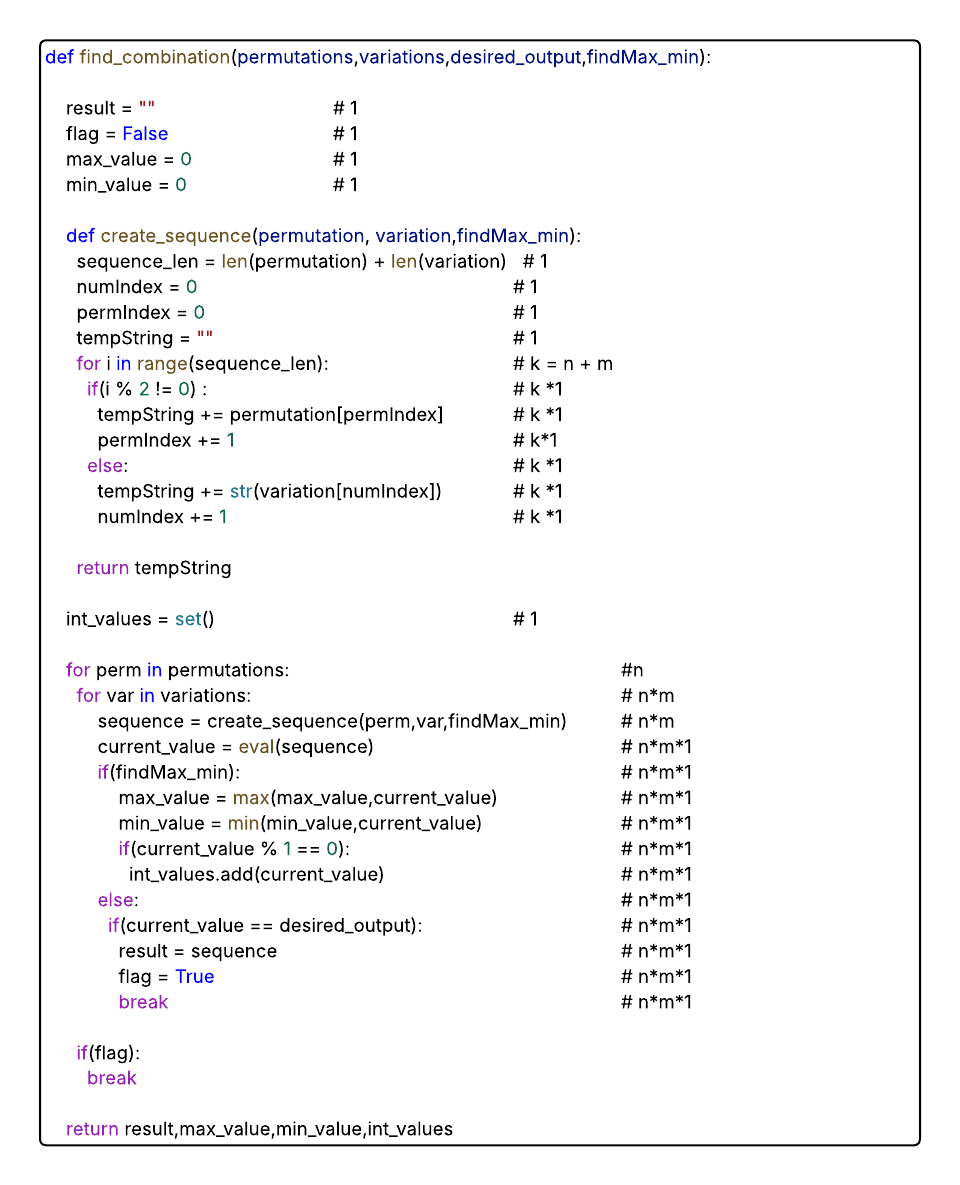

In [ ]:
display(Image(filename="/content/drive/MyDrive/Master/Optimizacion /modelado_problema.png",width=700, height=700))

Se tiene que la Big O de este algoritmo es de $O(n*p*k)$

*- Considerando a $O_p$ y $C$ como parte del algoritmo principal*

Hallaremos la complejidad de los algoritmos *variations* y *permutations* por separado:


*Permutations*

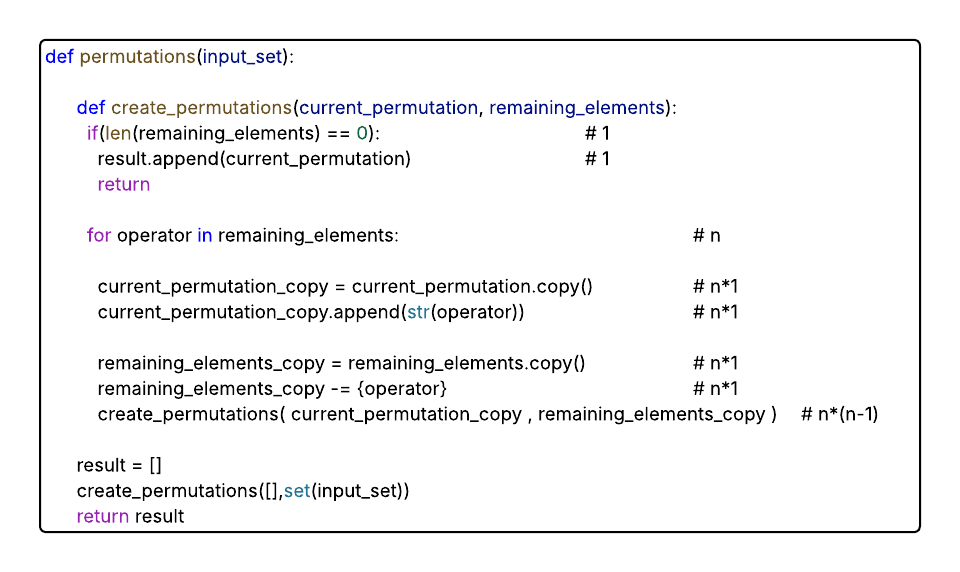

In [ ]:
display(Image(filename="/content/drive/MyDrive/Master/Optimizacion /permutaciones.png",width=800, height=500))

La big O para permutations es de

$$O(n!)$$

*Variations*


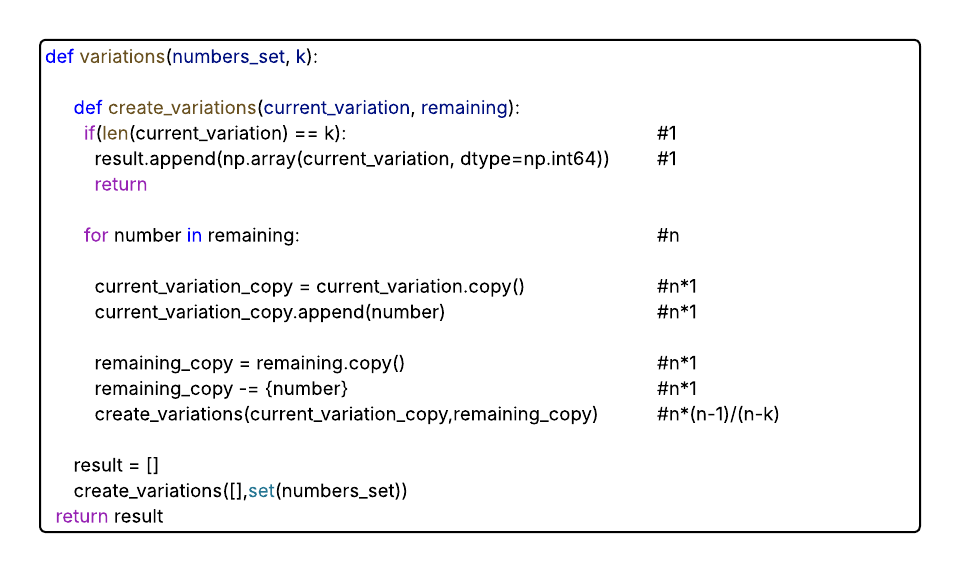

In [ ]:
display(Image(filename="/content/drive/MyDrive/Master/Optimizacion /variaciones.png",width=800, height=500))

 La big O es de

 $$O(\frac{n!}{(n-k)!})$$

Si pasaramos estas funciones como parámetros a la función *create_sequence* y, se ejecutasen dentro de la función, la Big O resultante quedaría de la siguiente forma:

$$Big O(n^2)= Big O(n*m) = d*n!*(\frac{m!}{(m-k)!})$$

Que corresponde al hecho de hacer todas las permutaciones primero y aplicarla a cada combinación posible.

**Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta.**

Para está sección vemos que el gran problema que enfrentamos es el gran espacio de búsqueda, por lo que, podríamos implementar 2 opciones, una primera opción de backtracking con heurística para detectar nodos inviables y reducir considerablemente la búsqueda de soluciones, y la segunda opción, es usar una metahurística que nos evita hacer una búsqueda exhaustiva en todo el espacio de soluciones pero a costa de no encontrar una solución en la población y generaciones dadas.

Para efectos de esta práctica implementaremos las 2 y veremos con cual nos quedamos.

1. Iniciaremos con una propuesta básica de backtracking y añadiremos una heurística para reducir el espacio de búsqueda.

In [ ]:

#Opción 1. Backtracking  +  heurística

def eval_sequence(sequence):
  return eval( "".join(map(str,sequence)))

def is_valid(seq,num,n,remaining):
    temp_seq = seq.copy()
    temp_seq.append(num)
    worst_scenario = remaining*9    #Heurísitca, en el peor de los escenarios asumimos que podemos añadir un 9 en los digitos restantes
    if(abs(n - eval_sequence(temp_seq) ) <  worst_scenario): return True  #Todavía podemos alcanzar el valor de n con los digitos restantes
    return False

def find_sequence(C,Op,n):
  sequence = []
  sequence_found = False

  def back_track_sequence(C,Op,Cx,Opx,n,seq):

    if(len(Op) == 0 and len(C) == 0): return -1        #No se encontró secuencia

    if(len(Op) == 0):                                   #Llegamos a la subrama más profunda del árbol y solo quedan números para iterar

          for num in C:
              temp_seq = seq.copy()
              temp_seq.append(num)
              if eval_sequence(temp_seq) == n:
                return temp_seq
          return None

    for num in C:
      seq_copy = seq.copy()
      if(is_valid(seq_copy,num,n,len(C)-1)):
        seq_copy.append(num)
        for op in Op:

          Cx_copy = Cx | {num}
          C_copy = C - Cx_copy
          Opx_copy = Opx | {op}
          Op_copy = Op - Opx_copy

          seq_copy.append(str(op))

          result = back_track_sequence(C_copy,Op_copy,Cx_copy,Opx_copy,n,seq_copy)      # Bajamos un nivel en el árbol si la secuencia es prometedora
          if result:
            return result
          seq_copy.pop()                                                #Hacemos backtracking si la secuencia deja de ser prometedora


  sequence = back_track_sequence(set(C), set(Op),set(),set(),n,[])

  return "".join(map(str,sequence))

res = find_sequence(C,Op,16)
print(res)

1-3+4/2*9


**Nota:** No hubo mejora en la asíntota computacional, solo se redujeron los tiempos de procesamiento al incluir condiciones de descarte por medio de la heurística implementada, pero en el peor de los escenarios, se debe recorrer gran parte del árbol de posibilidades.

2. Pasamos a implementar un algoritmo genético debido a que conocemos el genotipo de la solución.

In [ ]:
def eval_expr(expr):
  unique_elements = set()
  unique_elements.add(expr[0])
  for index in range(1,len(expr)):
    if (( type(expr[index-1]) == type(expr[index]) ) or (expr[index] in unique_elements) ): return None    #Verificamos si la secuencia es válida -> número - operador - número o si hay elementos repetidos
    unique_elements.add(expr[index])
  return eval( "".join(map(str,expr)))                            #Si es secuencia válida, evaluamos la expresión y devolvemos el resultado

In [ ]:
# Opción 2. Algoritmo Genético
from random import sample
# Paso 1. Definimos la estructura del gen

def create_individual(C,Op):
  C_copy = C.copy()
  Op_copy = Op.copy()
  individual = []
  for i in range(9):
    if( i % 2 == 0):    #Escoge digito
      individual.append(random.choice(C_copy))
      C_copy = np.delete(C_copy,np.where(C_copy == individual[i]))
    else:
      individual.append(random.choice(Op_copy))
      Op_copy = np.delete(Op_copy,np.where(Op_copy == individual[i]))
  return individual

In [ ]:
# Paso 2. Construimos las poblacion inicial

def create_population(C,Op,size):
  population = []
  for i in range(size):
    population.append(create_individual(C,Op))
  return population

In [ ]:
# Paso 3. Creamos función fitness

def fitness(individual,n):
  eval = eval_expr(individual)
  if eval == None: return float('inf')
  return abs(n -eval)

In [ ]:
# Paso 4. Seleccionamos a los mejores candidatos a aparearse por selección elitista

def selection(population,n):
  return min(sample(population,5), key=lambda x: fitness(x,n))

In [ ]:
# Paso 5. Hacemos cruce de padres

def crossover(parent1,parent2):
  point = random.randint(1, len(parent1) - 2)
  child = parent1[:point] + parent2[point:]
  return child

In [ ]:
# Paso 6. Hacemos mutación en la descendecia

def mutation(child,C,Op):
  gen = random.randint(0,len(child)-1)
  if(gen % 2 == 0):
    C_remaining = set(C) - set(child[::2])
    child[gen] = random.choice(list(C_remaining))
  else:
    Op_remaining = set(Op) - set(child[1::2])
    if(len(Op_remaining) != 0):
      child[gen] = random.choice(list(Op_remaining))
  return child

In [ ]:
# Generamos ciclo principal

def genetic_algorithm(C,Op,n,size,generations):
  population = create_population(C,Op,size)

  for i in range(generations):
    best_sample = sorted(population, key=lambda x: fitness(x,n))
    if(fitness(best_sample[0],n) == 0):
      return "".join(map(str,best_sample[0]))
    next_gen = best_sample[:len(best_sample)//2]  #Escogemos as los 10 mejores padres

    while len(next_gen) < size:
      parent1 = selection(population,n)
      parent2 = selection(population,n)
      child = crossover(parent1,parent2)        # Creamos descendencia
      if random.random() < 0.1:
        child = mutation(child,C,Op)                   # Mutamos descendencia
      next_gen.append(child)
    population = next_gen                       # Pasamos a la siguiente generación
  return None

res = genetic_algorithm(C,Op,-46,400,1000)
print(res)

3/1+5-6*9


**Calcula la complejidad del algoritmo.**

*Backtracking + Ramificación y poda*

Vemos que, a pesar de haber implementado la técnica de backtracking y apoyarnos del algoritmo de poda y ramificación, la asíntota no sufre ninguna mejora, puesto que en el peor de los escenarios, terminaremos por haber probado todas las combinaciones posibles, si acaso, solo incrementaremos la velocidad de recorrer todo el árbol. Es por esto que, la asíntota de este algoritmo sigue siendo de:

$$Big O (n*m) =  d*n!*(\frac{m!}{(m-k)!})$$

*Algoritmo Genético*

En este algoritmo ya es donde vemos una mejora sustancial, puesto que en el peor de los casos se tienen dos bucles anidados, uno que está en función del tamaño de la población que definimos al inicio y el otro bucle que se ejecutará para generar la siguiente población, la ventaja de este segundo bucle es que se ejecuta el número de soluciones padre hasta llegar al tamaño incial de población de entrada, por lo que la asíntota de este algoritmo queda de la siguiente manera:

$$Big O (n*n/k)$$

Por lo anterior, si buscarámos una mejora en la asíntota computacional a costa de no poder encontrar valores para un número dado, elegiriamos el algoritmo genético.


**Diseña un juego de datos de entrada aleatorio.**


In [ ]:
datos_test = [random.randint(-69, 70) for i in range(16)]
print(datos_test)


[25, 7, 33, -63, -52, -15, -69, 11, -54, -46, 0, -4, -35, 19, -19, 48]



**Aplica el algoritmo al juego de datos aleotrio generado.**


In [ ]:
results = {}
for n in datos_test:
  results[n] = genetic_algorithm(C,Op,n,400,1000)

for key,value in results.items():
  print(f"{key} -> {value}")

25 -> 9/3+6*4-2
7 -> 1*6+3-8/4
33 -> 6-1+8*7/2
-63 -> 2/1+7-8*9
-52 -> None
-15 -> 1+5-7/3*9
-69 -> None
11 -> 5*2-9/3+4
-54 -> 5/1+4-9*7
-46 -> None
0 -> 8+6-2*7/1
-4 -> 7+9/1-4*5
-35 -> 3/1+7-5*9
19 -> 3*7/1-6+4
-19 -> 7-9*6/2+1
48 -> 7/1+9*5-4




**Describe brevemente en unas líneas como crees que es posible avanzar con el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.**

Debido a la naturaleza del problema, es posible hallar múltiples soluciones para un número n dado, además, por las restricciones del mismo, hace inviable aplicar algoritmos exactos, ya que recorrer todo el árbol de posibilidades se vuelve una tarea costosa, por lo tanto, los métodos metahurísticos se adaptan muy bien al problema.

Por lo anterior, una posible línea de investigación sería:

<ol>
<li>Si se desea continuar usando un algoritmo genético, se puede investigar el número de población y generaciones mínimos para cubrir todo el espectro de soluciones, ya que, es posible no encontrar un solución para cierto número de población o generación.</li>
<li>Otra línea de investigación sería para considerar repeticiones tanto en el uso de los operadores o cifras o bién, encontrar la mínima combinación de operadores y cifras que te den el número deseado.</li>
</ol>

# Referencias
- [1] Torra i R. Vicenc , "Resoclución de problemas y búsqueda" ,https://openaccess.uoc.edu/server/api/core/bitstreams/93d847f8-15a0-4b24-acb7-2e20932c2faf/content
- [2] Lopez T. B. , "Algoritmos genéticos" ,https://nlaredo.tecnm.mx/takeyas/Apuntes/Inteligencia%20Artificial/Apuntes/tareas_alumnos/AG/Manual%20Algoritmos%20Geneticos.pdf
- [3] Leodanis , "Python eval(): Evaluates Expressions Dynamically" ,https://realpython.com/python-eval-function/